# Latent Manifold and Regression

This example explains Multiple Linear Regression with Python 3, pandas and scikit-learn on Jupyter Notebook.
## Requirements
To use this example you need Python 3 and latest versions of pandas and scikit-learn. I used Anaconda distribution to install.

### Data Set: 
1.	Kaggle news data: https://www.kaggle.com/snapcrack/all-the-news
2.	Real News Dataset https://webhose.io/datasets/
3.	Domain Ranking: https://www.rankstore.com/bulk-alexa-rank-checker/#

### ML life-cycle:
1.	Business objective connected to it.
2.	Data set, data enrichment, wrangle and prepare it.
3.	Find a latent manifold
4.	What the data is saying

## Algorithm
1.	Multiple Linear Regression.

In [305]:
# Multiple Linear Regression

# Importing the librariesFakeAndReal.csv

In [306]:
# Importing the dataset
df = pd.read_csv('RealNewsData2.csv', delimiter='\t', quoting=3)#3 - ignores ""
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 4].values

print(df.shape)

(1742, 20)


In [307]:
# selecting Latent column
dfdomain = df.loc[:, ['domain_rank', 'type']]
print(dfdomain.shape)
X = dfdomain.iloc[:, :-1].values
y = dfdomain.iloc[:, 1].values
print(X)

(1742, 2)
[[    5]
 [  598]
 [  943]
 ...
 [99999]
 [99999]
 [99999]]


In [308]:
# LabelEncoder - Encoding categorical data to number, OneHotEncoder - row to column 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
#onehotencoder = OneHotEncoder(categorical_features = [0])
#y = onehotencoder.fit_transform(y).toarray()
print(y)

[2 2 2 ... 1 1 1]


In [309]:
'''
import seaborn as sns
sns.set()

c = X+y
print(c)
# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="domain_rank", y="type", hue="species",
               truncate=True, height=5, data=c)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Domain Score", "Type")
'''

'\nimport seaborn as sns\nsns.set()\n\nc = X+y\nprint(c)\n# Plot sepal with as a function of sepal_length across days\ng = sns.lmplot(x="domain_rank", y="type", hue="species",\n               truncate=True, height=5, data=c)\n\n# Use more informative axis labels than are provided by default\ng.set_axis_labels("Domain Score", "Type")\n'

In [310]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [311]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True, n_jobs=1, normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [312]:
# Predicting the Test set results
y_pred = np.round(regressor.predict(X_test))
print(y_test)
print(y_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.

In [313]:
# Python script for confusion matrix creation.
print(y_test.shape)
print(y_pred.shape)
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :')
print(results)

(349,)
(349,)
Confusion Matrix :
[[  0   1   0]
 [  0 346   0]
 [  0   2   0]]


In [314]:
from sklearn.metrics import accuracy_score
print('Accuracy Score :',accuracy_score(y_test, y_pred))

Accuracy Score : 0.9914040114613181


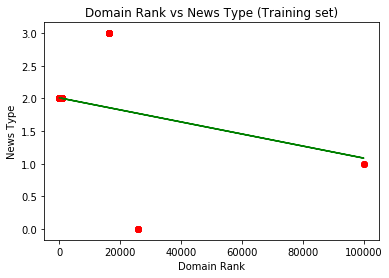

In [315]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Domain Rank vs News Type (Training set)')
plt.xlabel('Domain Rank')
plt.ylabel('News Type')
plt.show()

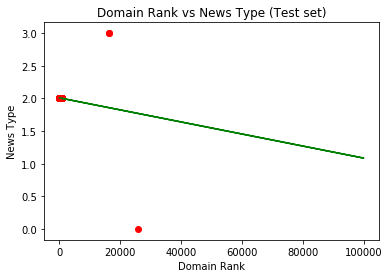

In [316]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Domain Rank vs News Type (Test set)')
plt.xlabel('Domain Rank')
plt.ylabel('News Type')
plt.show()